# Classifying grayscale images of handwritten digits

## Loading the MNIST dataset in Keras

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [35]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let's have a look at the training data:

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
len(train_labels)

60000

In [38]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a closer look at the training images:

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
train_images.dtype

dtype('uint8')

So what we have here is a 3D tensor of 8-bit integers. More precisely, it's an array of 60 000 matrices of 28 x 8 integers.

## Displaying the fourth digit

In [41]:
digit = train_images[4]

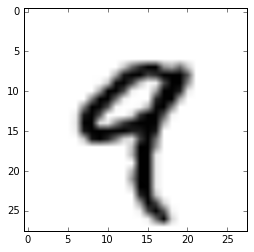

In [42]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## The network architecture

Layer: A data-processing module that you can think of as a filter for data.

Model: Like a sieve for data-processing, made of a succession of increasingly refined data filters (the layers).

In [43]:
from keras import models
from keras import layers

network = models.Sequential()

First layer of our network

Returns a tensor

In [44]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

Second layer of our network

Returns an array of 10 propability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

In [45]:
network.add(layers.Dense(10, activation='softmax'))

## The compilation step

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

- An optimizer: this is the mechanism through which the network will **update itself** based on the data it sees and its loss function.

- A loss function: the is how the network will be able to **measure how good a job it is doing on its training data**, and thus how it will be able to steer itself in the right direction.

- Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [46]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Preparing the image data

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval. Previously, our training images for instance were stored in an array of shape **(60000, 28, 28) of type uint8 with values in the [0, 255] interval**. We transform it into a float32 array of shape **(60000, 28 * 28) with values between 0 and 1**.

Lets use the numpy.reshape() method which gives a new shape to an array without changing its data.

And .astype() method which converts vectors, matrices and columns within a DataFrame.

In [47]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

If we had:

**'red', 'red', 'green'**

We could represent it with the integer encoding:

**0, 0, 1**

In [48]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Train the network

Lets train the network by "fitting" the model to its training data.

In [49]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.2606 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.1052 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0686 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0496 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0375 - acc: 0.9888


## Accuracy test

Let's check that our model performs well on the test set too.

In [50]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/step


In [51]:
print('test_acc:', test_acc)

test_acc: 0.9808
